In [9]:
import pandas as pd

In [11]:
# Load the dataset
df = pd.read_excel("glass.xlsx", sheet_name='glass')

In [13]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# EDA & Data PReprocessing

In [15]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (214, 10)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


###  The Glass dataset contains only numerical features, and the target variable Type is already numerical, so no encoding is needed

In [19]:
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [28]:
df.duplicated().sum()

1

In [42]:
df.drop_duplicates(inplace=True)

In [44]:
df.duplicated().sum()

0

In [46]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

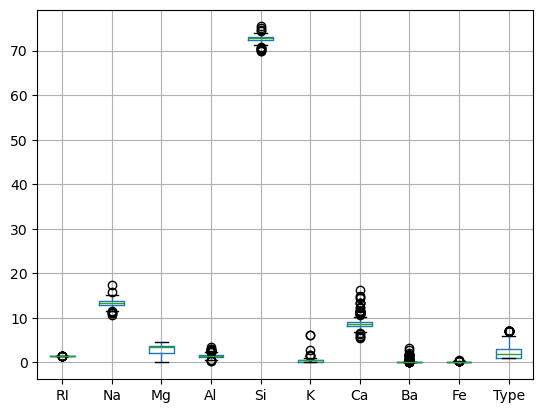

In [51]:
df.boxplot()
plt.show()

In [53]:
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

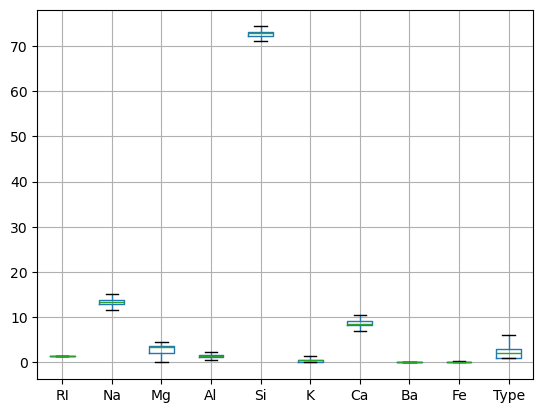

In [55]:
df.boxplot()
plt.show()

In [86]:
# Separate features and target
features = df.drop('Type', axis=1)
target = df['Type']

## Feature Scaling
- Random Forests don’t require scaling

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

In [95]:
#  Handling Class Imbalance
print(target.value_counts())

Type
2.0    76
1.0    69
6.0    38
3.0    17
5.0    13
Name: count, dtype: int64


# 2: Data Visualization

## Histogram

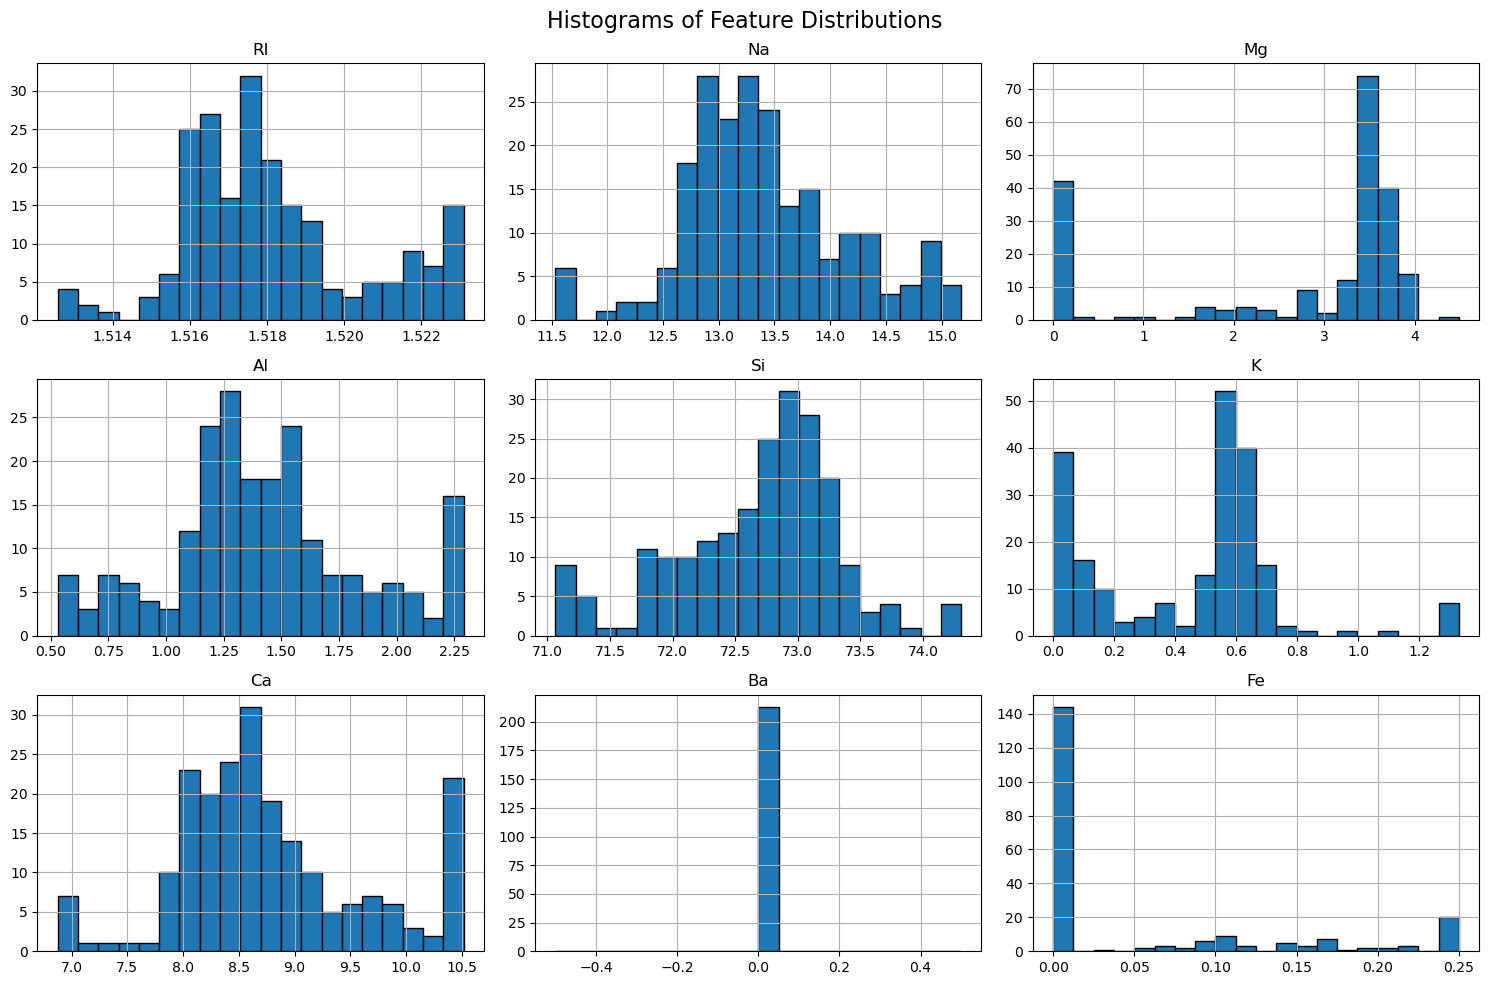

In [65]:
features.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

## Box Plots

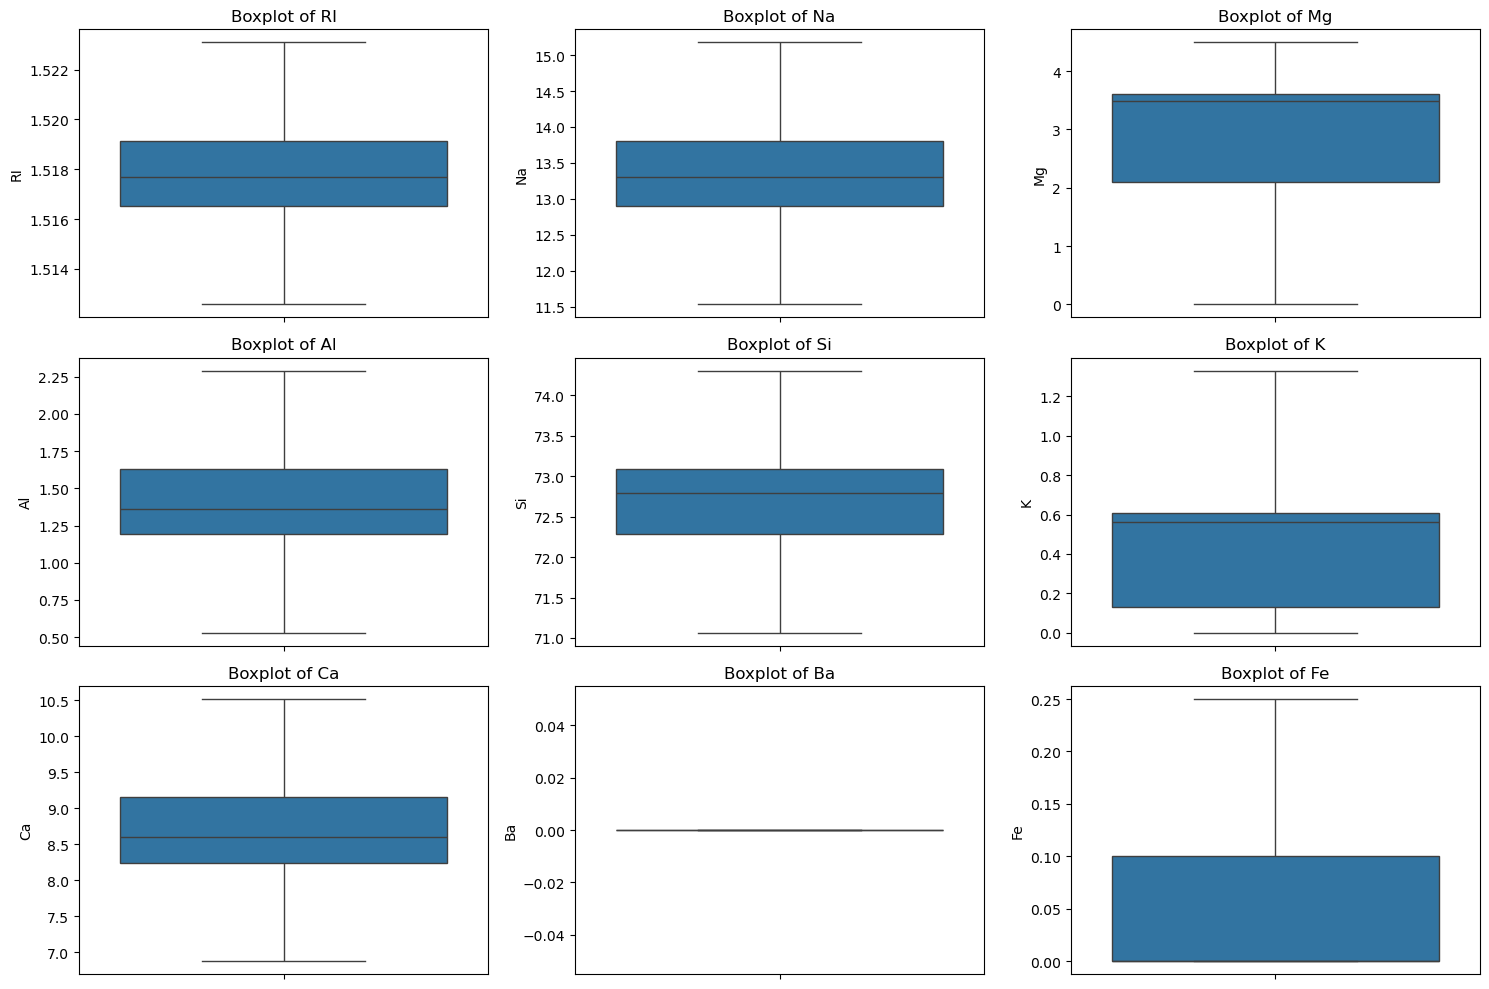

In [71]:
import seaborn as sns
plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=features[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

## Pair Plot

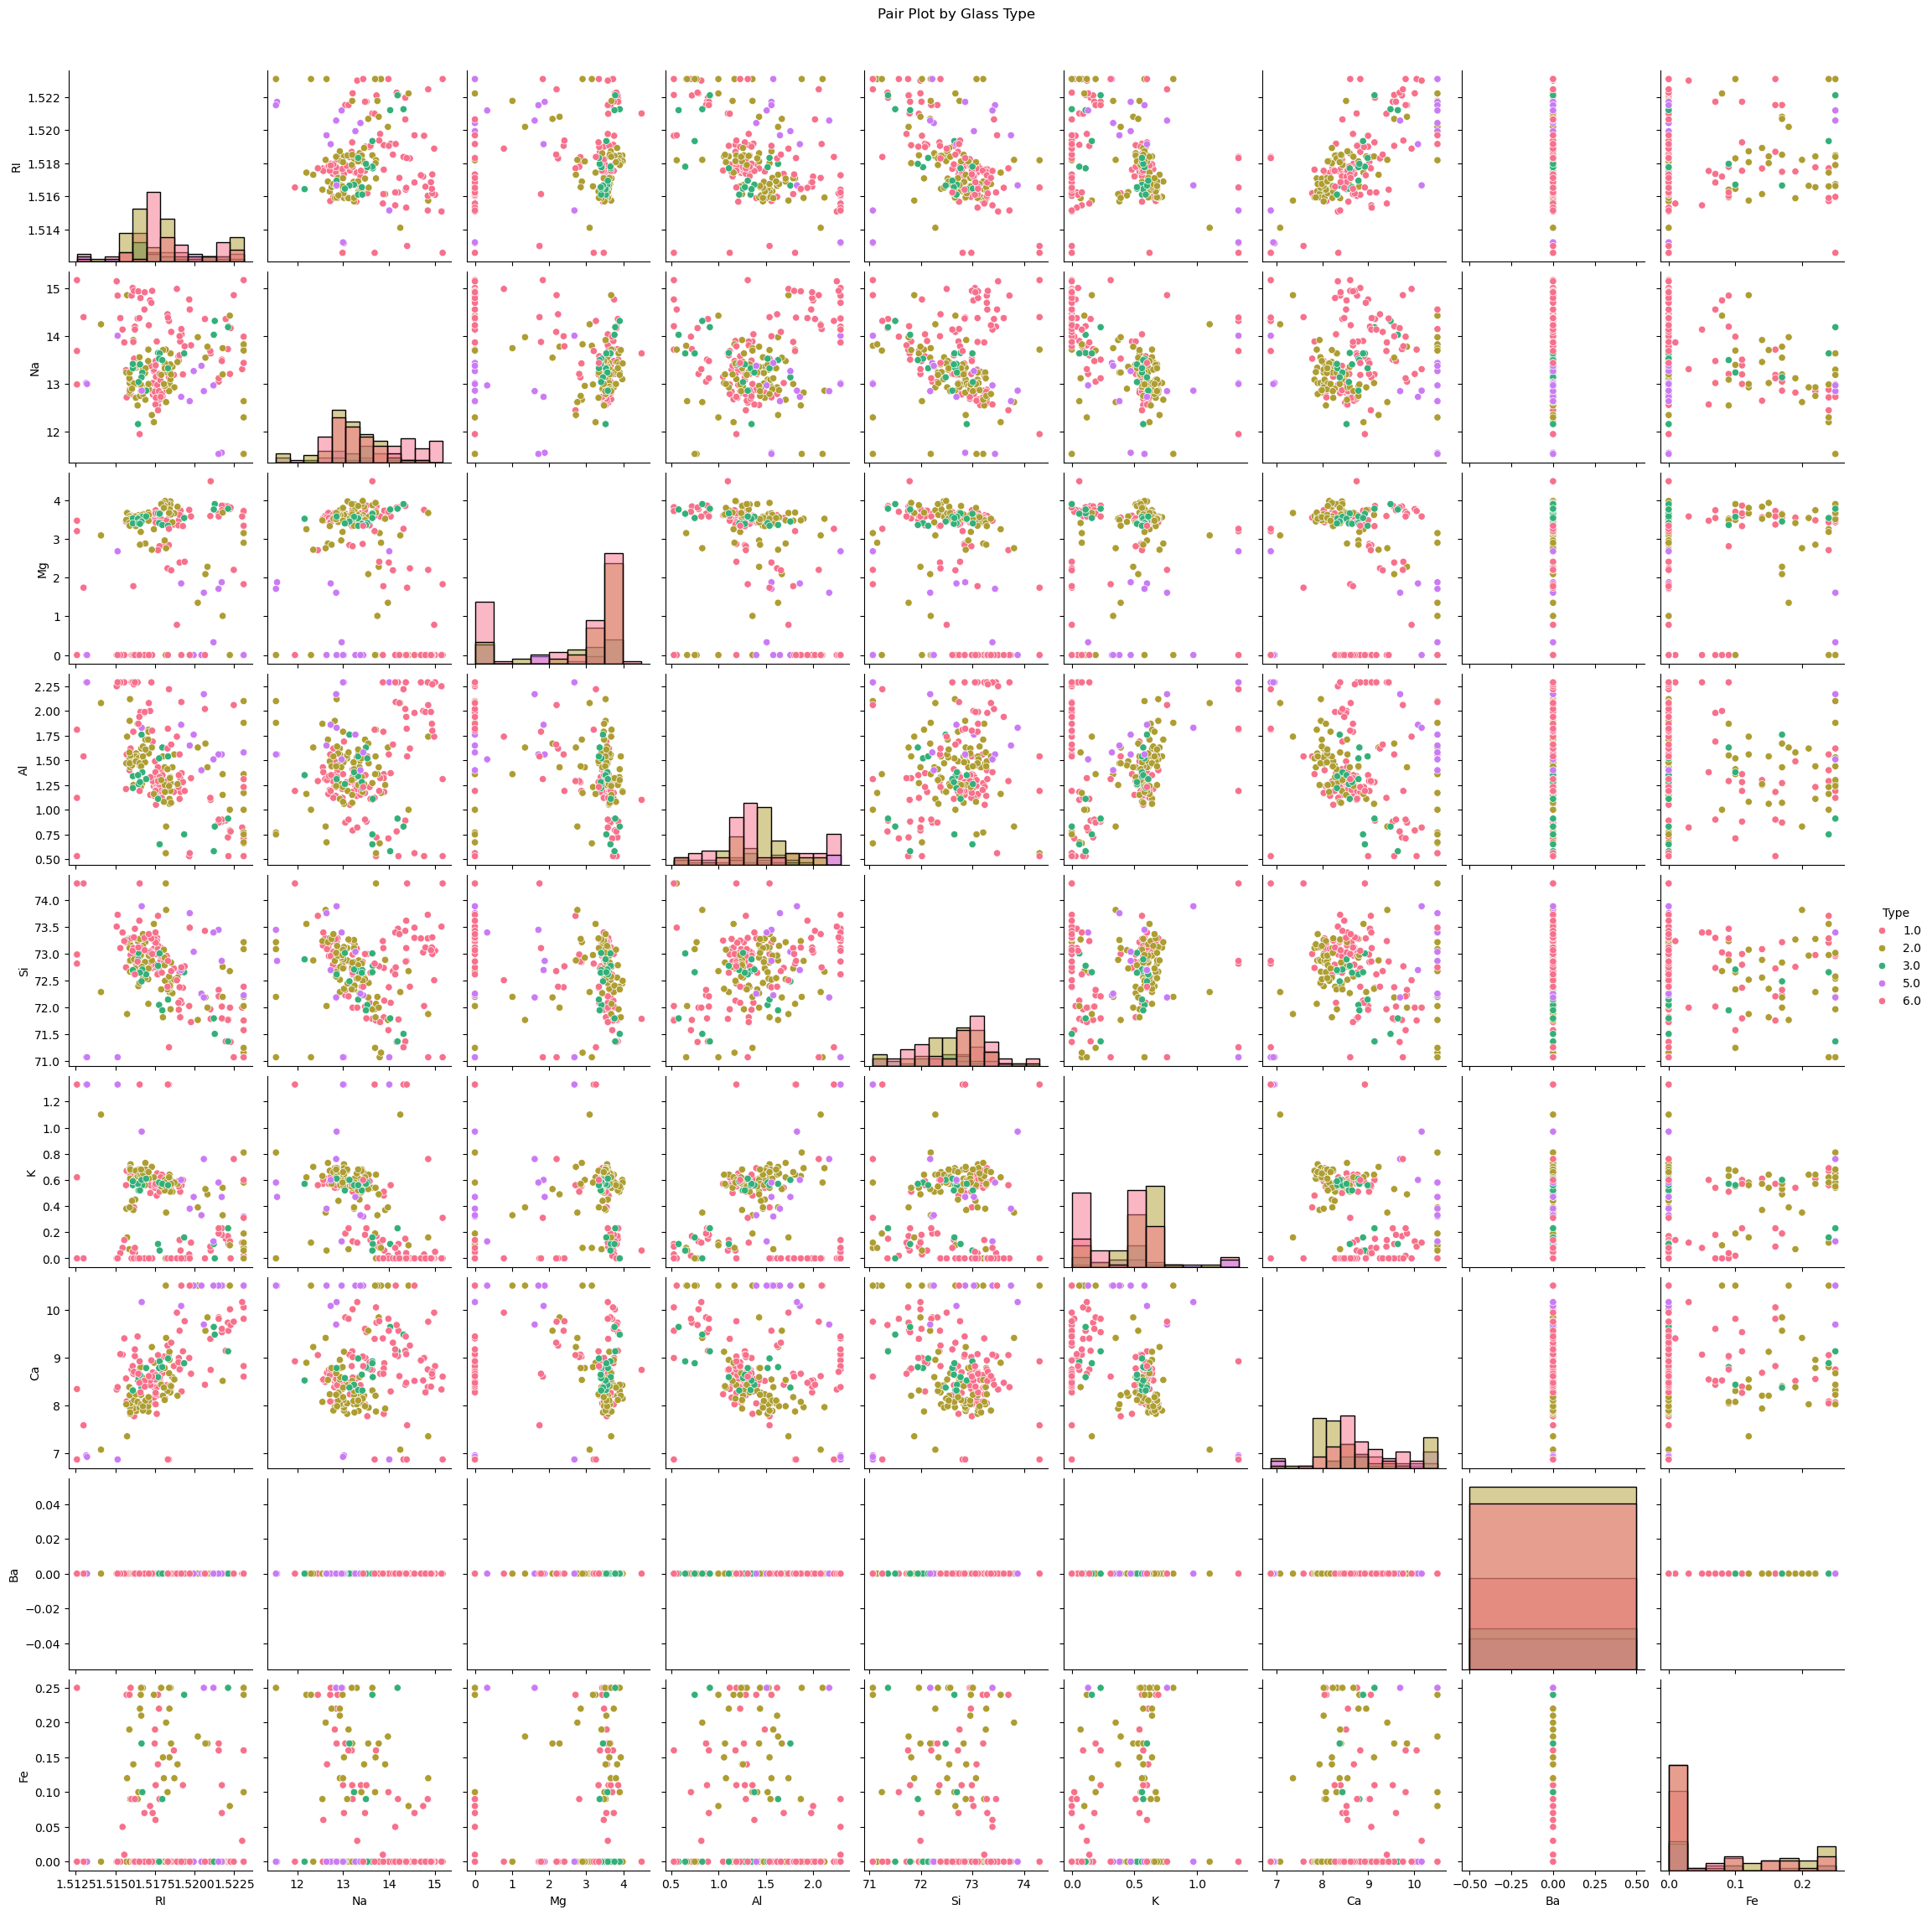

In [74]:
sns.pairplot(df, hue='Type', diag_kind='hist', palette='husl')
plt.suptitle("Pair Plot by Glass Type", y=1.02)
plt.show()

## Correlation Heatmap

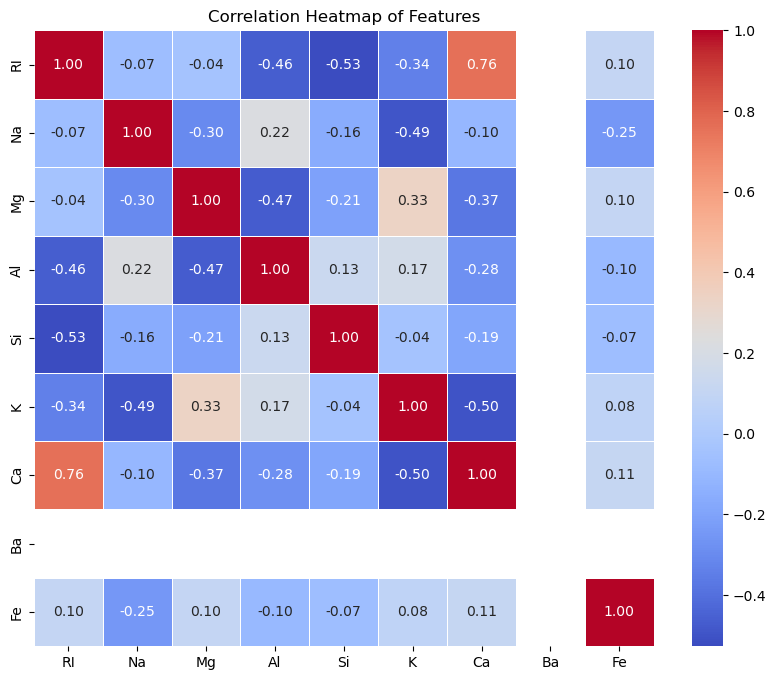

In [77]:
plt.figure(figsize=(10, 8))
corr = features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# 4: Random Forest Model Implementation

### 1. Divide the data into train and test split.

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.2, stratify=target, random_state=42)

In [109]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 9)
(43, 9)
(170,)
(43,)


### 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

In [115]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [119]:
# Train the model
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predict on test data
y_pred = rf.predict(x_test)

In [124]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8604651162790697
Precision (macro): 0.9117063492063492
Recall (macro): 0.8123809523809523
F1-score (macro): 0.8470858688302908


In [126]:
# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         1.0       0.81      0.93      0.87        14
         2.0       0.86      0.80      0.83        15
         3.0       1.00      0.67      0.80         3
         5.0       1.00      0.67      0.80         3
         6.0       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.91      0.81      0.85        43
weighted avg       0.87      0.86      0.86        43



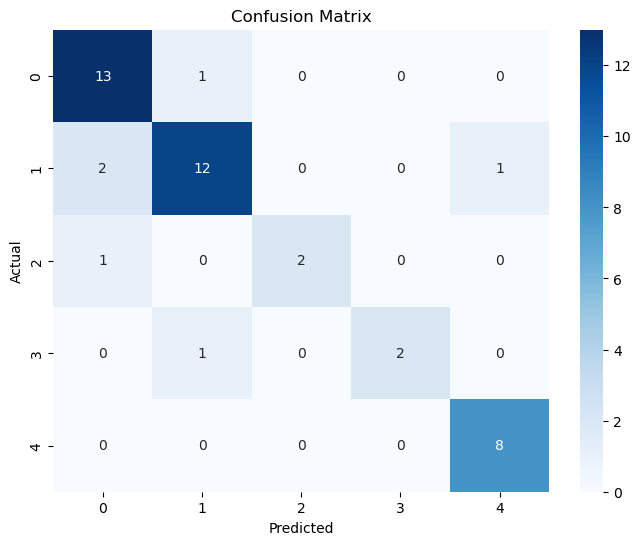

In [130]:
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5: Bagging and Boosting Methods

In [138]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Updated parameter name: use 'estimator' instead of 'base_estimator'
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

In [140]:
bagging_model.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [152]:
y_pred_bag = bagging_model.predict(x_test)
y_pred_bag

array([6., 5., 2., 5., 1., 2., 2., 6., 1., 1., 3., 1., 6., 6., 1., 2., 6.,
       1., 2., 2., 1., 1., 6., 2., 1., 3., 2., 2., 2., 2., 6., 1., 1., 6.,
       2., 2., 1., 1., 6., 1., 1., 2., 6.])

In [144]:
from sklearn.ensemble import AdaBoostClassifier

boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)

In [146]:
boosting_model.fit(x_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [148]:
y_pred_boost = boosting_model.predict(x_test)

In [150]:
y_pred_boost

array([6., 6., 2., 6., 1., 2., 2., 6., 1., 2., 1., 1., 6., 6., 2., 6., 6.,
       1., 1., 6., 2., 1., 6., 1., 1., 1., 6., 6., 2., 1., 6., 1., 1., 2.,
       1., 1., 1., 2., 2., 1., 1., 6., 6.])

### 1. Explain Bagging and Boosting methods. How is it different from each other.
- Bagging (Bootstrap Aggregating) and Boosting are ensemble learning techniques that improve model performance by combining multiple models. Bagging builds several models independently using random subsets of the data and combines their outputs, which helps reduce variance and avoid overfitting. Random Forest is a popular bagging method.
- Boosting builds models sequentially. Each new model tries to correct the errors made by the previous one, focusing more on the difficult cases. This reduces bias and improves accuracy, but may risk overfitting if not managed carefully. AdaBoost and Gradient Boosting are common boosting techniques.

### 2. Explain how to handle imbalance in the data.
- When dealing with imbalanced data, the model may favor the majority class and perform poorly on the minority. To address this, you can use stratified sampling during train-test split, apply resampling methods like SMOTE to balance the dataset, or use algorithms that support class weights to penalize misclassification of minority classes more heavily.